Dijkstra's algorithm is an designed to find the shortest paths between nodes in a graph. It was designed by a Dutch computer scientist, Edsger Wybe Dijkstra, in 1956, when pondering the shortest route from Rotterdam to Groningen. 

- Keep track of all the vertices that have been assigned their correct shortest path. 
- Set all costs of all vertices in the graph to 'infinity' to make sure that every other cost we may compare will be smaller than the start.
- Set the starting vertex (s) to 0 (there is no path to itself)
- Pick a vertex with the shortest currect cost, visit it and add it to the visisted vertices
- Update the costs of all its afjacent vertices that are not visited yet. 

<img src="https://s3.stackabuse.com/media/articles/dijkstras-algorithm-in-python-1.png" alt="dijkstra step 1"/>

Vertex 0 is our starting point. 

In [23]:
vertex = [0,1,2,3,4,5,6,7,8]
s = 0
visited = []
cost = [0 if v == s else float('inf') for v in vertex]
print(f'Vertex: {vertex}\nCost: {cost}\nVisited: {visited}')

Vertex: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Cost: [0, inf, inf, inf, inf, inf, inf, inf, inf]
Visited: []


In [25]:
dictionary = {}
for vertex, cost in zip(vertex,cost):
    dictionary[vertex] = cost

dictionary

{0: 0, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf}

We pick the vertex with a minimum cost - that is Vertex 0. We will mark it as visited and add it to our set of visited vertices. The starting node will always have the lowest cost so it will always be the first one to be added:

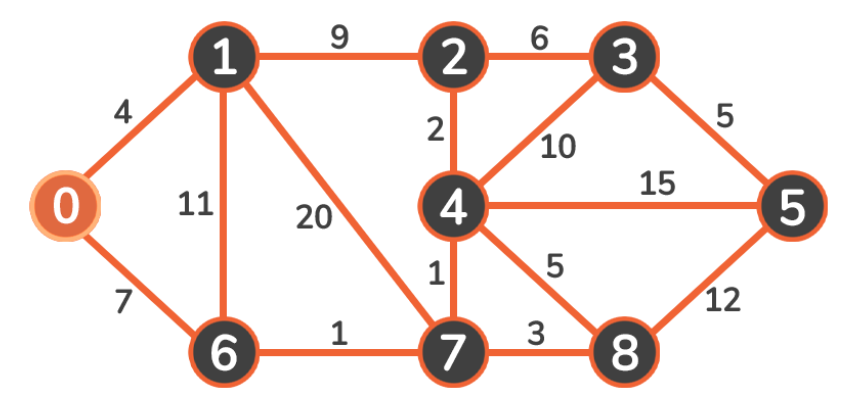

Then, we will update the cost of adjacent vertices (1 and 6). Since 0 + 4 < infinity and 0 + 7 < infinity, we update the costs to these vertices:



In [18]:
cost[1] = 4
cost[6] = 7
visited.append(0)
print(f'Vertex: {vertex}\nCost: {cost}\nVisited: {visited}')

Vertex: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Cost: [0, 4, inf, inf, inf, inf, 7, inf, inf]
Visited: [0]


Now we visit the next smallest cost vertex. The weight of 4 is lower than 7 so we traverse to Vertex 1:
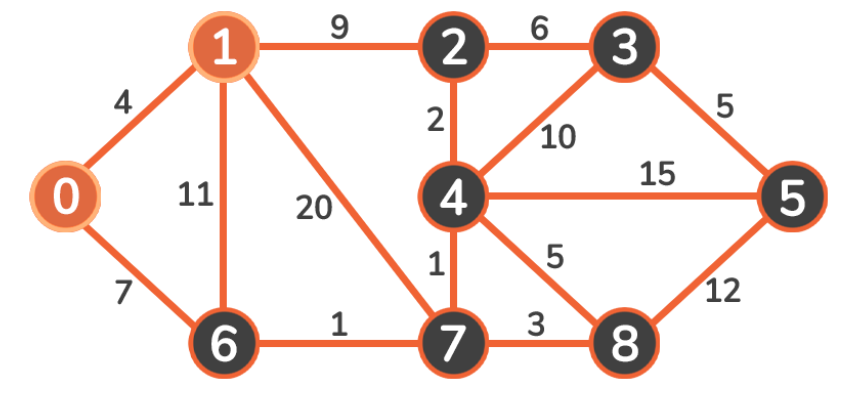

In [21]:
cost[2] = 4 + 9
cost[7] = 4 + 20
# Since the cost of
if cost[6] > 4 + 11:
    cost[6] = 4 + 11
visited.append(1)
print(f'Vertex: {vertex}\nCost: {cost}\nVisited: {visited}')

Vertex: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Cost: [0, 4, 13, inf, inf, inf, 7, 24, inf]
Visited: [0, 1]


Next, vertex 6 is visisted and its adjacent vertice's costs are calculated. Next, the next smallest cost vertex is visisted and this process is repeated until all vertices have been visisted. Now we will have a final cost list representing the shortest paths from node 0 to every other node in the graph. 

In [27]:
import math
import networkx as nx
import matplotlib.pyplot as plt
from random import seed, randint

In [47]:
def Dijkstra(graph, s):
    # Initialise lists
    visited = []
    vertex = list(graph.nodes)
    cost = [0 if v == s else float('inf') for v in vertex]
    current_vertex = s
    
    # Creating a dictionary for storing costs
    cost_dict = {}
    for v, c in zip(vertex, cost):
        cost_dict[v] = [c, None]
        
    # Iterate while not all nodes have been visited
    while len(visited) < len(vertex):
        
        # Get weight of neighboring vertex (v) by adding weight of current (u)
        for u, v in graph.edges(current_vertex):
            weight = graph.edges[(u, v)]['d'] + cost_dict[u][0]

            # If the weight is smaller than the previous one, replace it
            if weight < cost_dict[v][0]:
                cost_dict[v][0] = weight
                cost_dict[v][1] = u
        
        # Add current node to visited list
        visited.append(current_vertex)
        
        # Find the next current node
        min_cost = float('inf')
        next_vertex = None
        
        for v in vertex:
            if v not in visited and cost_dict[v][0] < min_cost:
                min_cost = cost_dict[v][0]
                next_vertex = v

        # Update the current_vertex for the next iteration
        current_vertex = next_vertex
    
    return cost_dict

In [49]:
def find_shortest_path(graph, s, t):
    # Run Dijkstra's algorithm to obtain the cost dictionary
    cost_dict = Dijkstra(graph, s)

    # Check if there is a path from source to target
    if cost_dict[t][0] == float('inf'):
        return "No path exists from {} to {}".format(s, t)

    # Construct the shortest path
    path = []
    current_vertex = t

    while current_vertex != s:
        path.append(current_vertex)
        current_vertex = cost_dict[current_vertex][1]

    path.append(s)
    path.reverse()

    return path

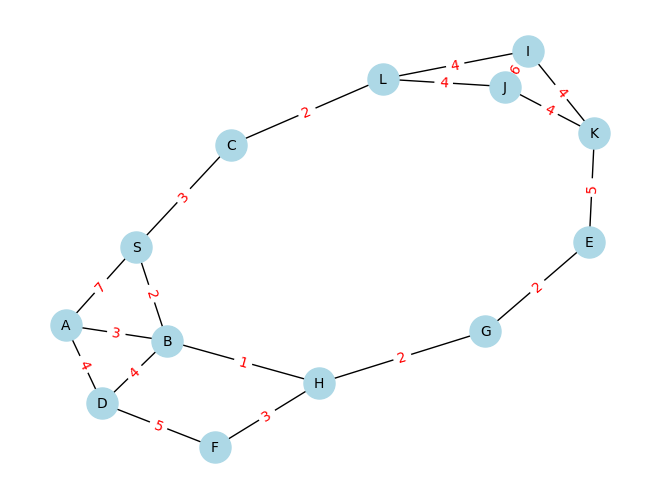

In [29]:
g = nx.Graph()
g.add_edges_from([
    ('S', 'A', {'d': 7}),
    ('S', 'B', {'d': 2}),
    ('S', 'C', {'d': 3}),
    ('A', 'B', {'d': 3}),
    ('A', 'D', {'d': 4}),
    ('B', 'D', {'d': 4}),
    ('B', 'H', {'d': 1}),
    ('C', 'L', {'d': 2}),
    ('D', 'F', {'d': 5}),
    ('H', 'F', {'d': 3}),
    ('H', 'G', {'d': 2}),
    ('G', 'E', {'d': 2}),
    ('L', 'I', {'d': 4}),
    ('L', 'J', {'d': 4}),
    ('I', 'J', {'d': 6}),
    ('I', 'K', {'d': 4}),
    ('J', 'K', {'d': 4}),
    ('E', 'K', {'d': 5}),
])

edge_labels = {(u, v): d['d'] for u, v, d in g.edges(data=True)}
    
# Visualize the graph
pos = nx.spring_layout(g)  # Positions nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, font_color='red')

plt.show()

In [48]:
Dijkstra(g,'S')

{'S': [0, None],
 'A': [5, 'B'],
 'B': [2, 'S'],
 'C': [3, 'S'],
 'D': [6, 'B'],
 'H': [3, 'B'],
 'L': [5, 'C'],
 'F': [6, 'H'],
 'G': [5, 'H'],
 'E': [7, 'G'],
 'I': [9, 'L'],
 'J': [9, 'L'],
 'K': [12, 'E']}

In [52]:
find_shortest_path(g,'S', 'E')

['S', 'B', 'H', 'G', 'E']

In [67]:
##
# APPLYING IT TO JSON INPUT
import json

def parse_json_data(json_data):
    # Load JSON data
    data = json.loads(json_data)

    # Create an empty graph
    graph = nx.Graph()

    # Add nodes to the graph
    nodes = data["elements"]["nodes"]
    for node in nodes:
        node_id = node["data"]["id"]
        graph.add_node(node_id)

    # Add edges to the graph
    edges = data["elements"]["edges"]
    for edge in edges:
        source = edge["data"]["source"]
        target = edge["data"]["target"]
        weight = edge["data"]["w"]
        distance = edge["data"]["d"]  # Store the distance attribute as "d" instead of "distance"
        graph.add_edge(source, target, weight=weight, d=distance)  # Store the distance attribute as "d"

    return graph

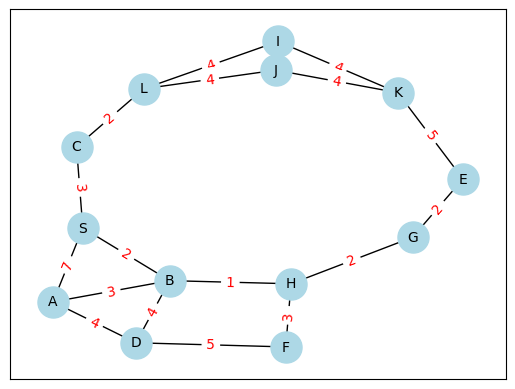

In [71]:
json_file = "/home/anuk-k/Graph-theory/graph.json"

with open(json_file, 'r') as f:
    json_data = f.read()
    
# Visualise
node_color = 'lightblue'
node_size = 500
font_size = 10

# Create a layout for the graph
pos = nx.spring_layout(graph)

# Draw the graph
nx.draw_networkx(graph, pos, with_labels=True, node_color=node_color, node_size=node_size, font_size=font_size)

# Draw edge labels (red color)
edge_labels = nx.get_edge_attributes(graph, 'd')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')

# Display the graph
plt.show()

In [73]:
graph = parse_json_data(json_data)
cost_dict = Dijkstra(graph, 'S')
find_shortest_path(graph, 'S', 'E')

['S', 'B', 'H', 'G', 'E']